In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("xxxx.csv", sep = ',')
df.head()

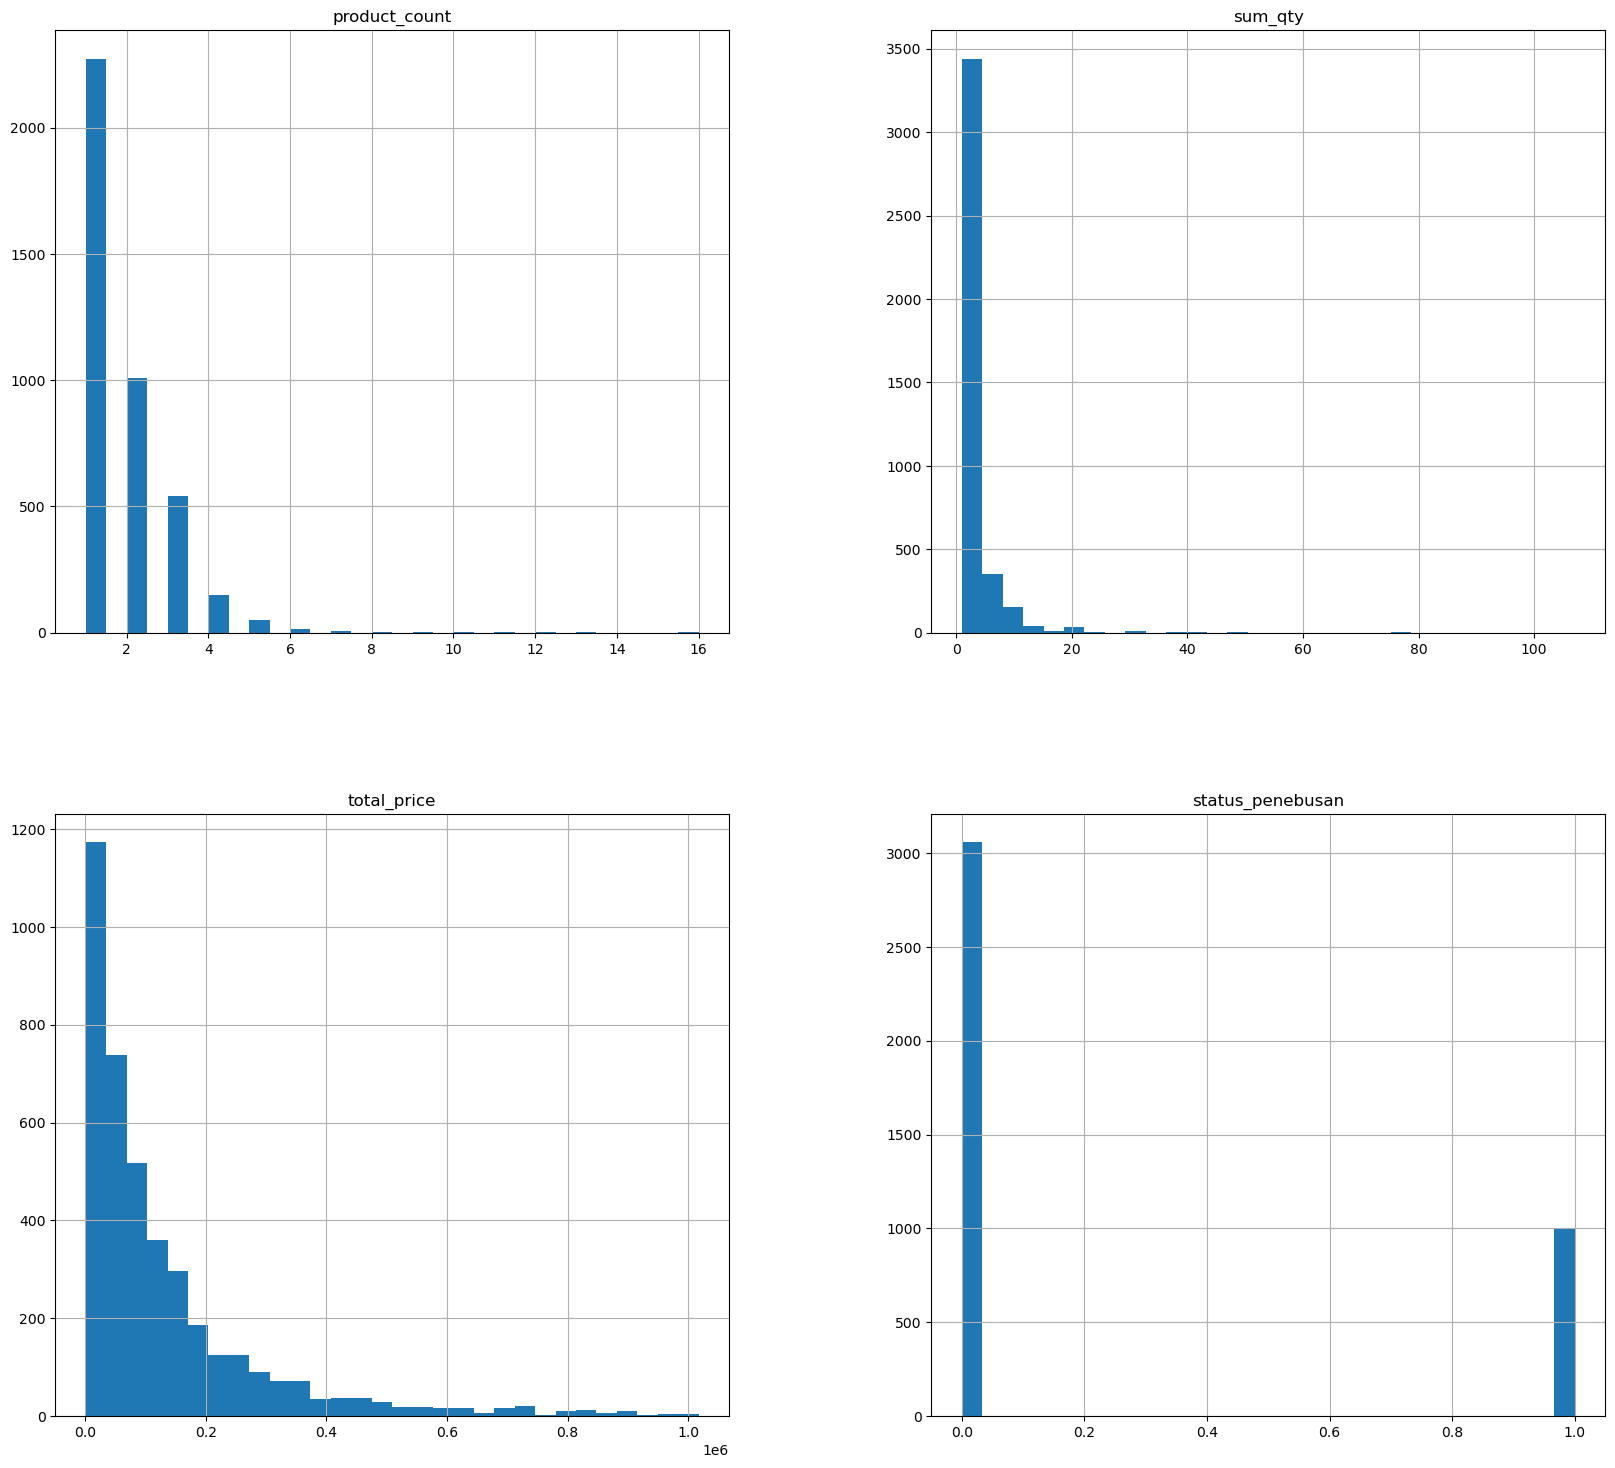

In [14]:
# Visualisasi Variabel Numerik
df. hist(figsize=(20,18), bins=30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

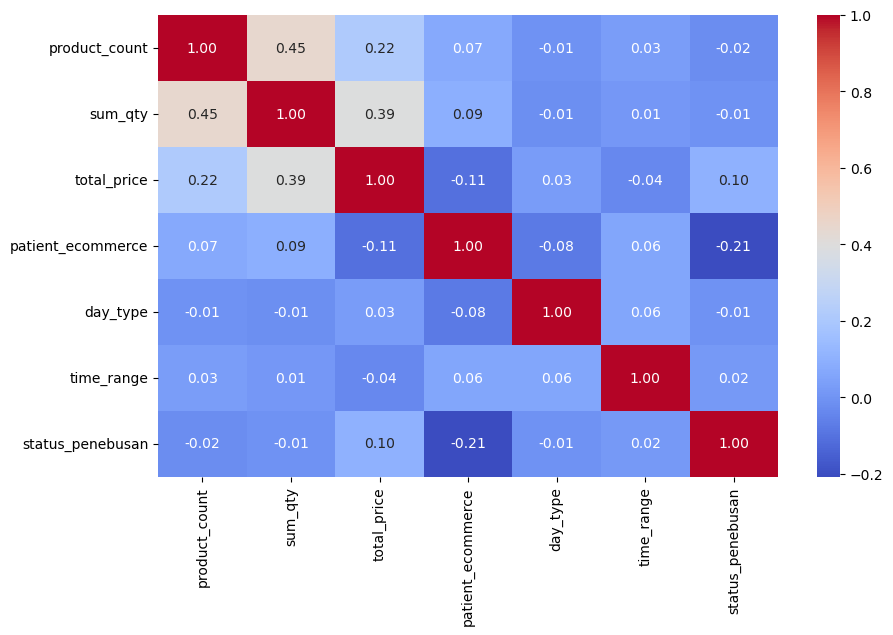

In [18]:
# Analisis Korelasi

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show

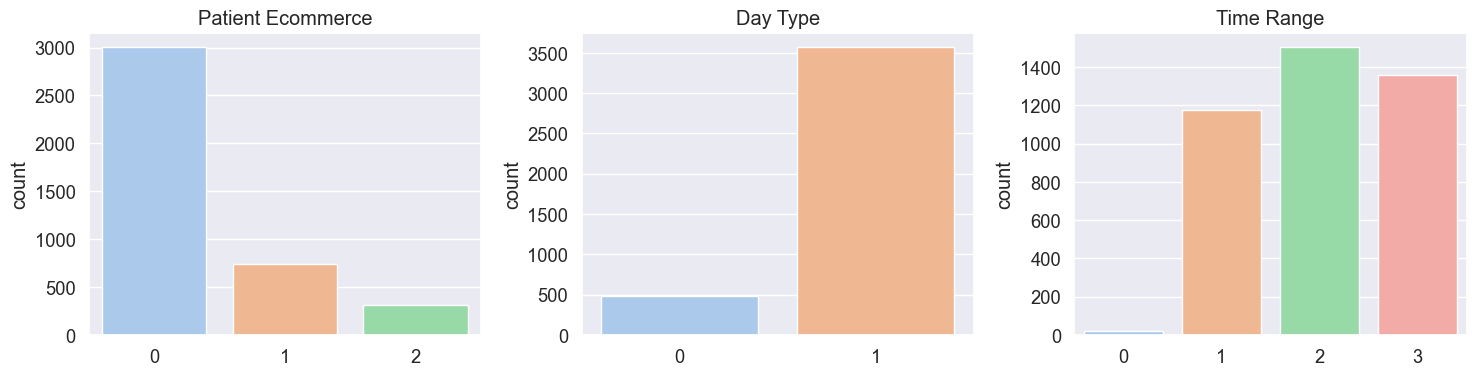

In [235]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Bar chart untuk patient_ecommerce
sns.countplot(data=df, x='patient_ecommerce', ax=axes[0], palette='pastel')
axes[0].set_title('Patient Ecommerce')
axes[0].set_xlabel('')
axes[0].set_ylabel('count')
axes[0].tick_params(axis='x', rotation=0)

# Bar chart untuk day_type
sns.countplot(data=df, x='day_type', ax=axes[1], palette='pastel')
axes[1].set_title('Day Type')
axes[1].set_xlabel('')
axes[1].set_ylabel('count')

# Bar chart untuk time_range
sns.countplot(data=df, x='time_range', ax=axes[2], palette='pastel')
axes[2].set_title('Time Range')
axes[2].set_xlabel('')
axes[2].set_ylabel('count')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


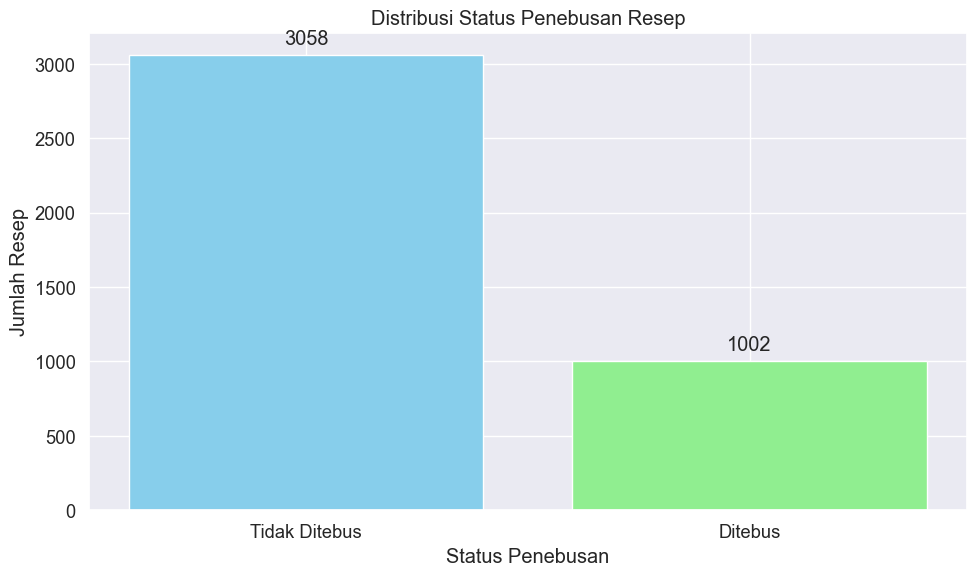

In [238]:
# Hitung frekuensi masing-masing kategori
status_counts = df['status_penebusan'].value_counts().sort_index()

# Buat label
labels = ['Tidak Ditebus', 'Ditebus']

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, status_counts, color=['skyblue', 'lightgreen'])

# Tambahkan label jumlah di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

plt.title('Distribusi Status Penebusan Resep')
plt.ylabel('Jumlah Resep')
plt.xlabel('Status Penebusan')
plt.tight_layout()
plt.show()

## Splitting Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
X = df1.drop('status_penebusan', axis=1).values
XX = df1.drop('status_penebusan', axis=1)
y = df1['status_penebusan'].values

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[0.        , 0.        , 0.11892972, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.01886792, 0.02688495, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.13333333, 0.01886792, 0.01953121, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.01886792, 0.02688495, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.02830189, 0.18075231, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=2025)

In [35]:
X_train.shape

(2842, 12)

In [36]:
X_test.shape

(1218, 12)

# SMOTE

#### Original Data

In [37]:
from imblearn.over_sampling import SMOTE

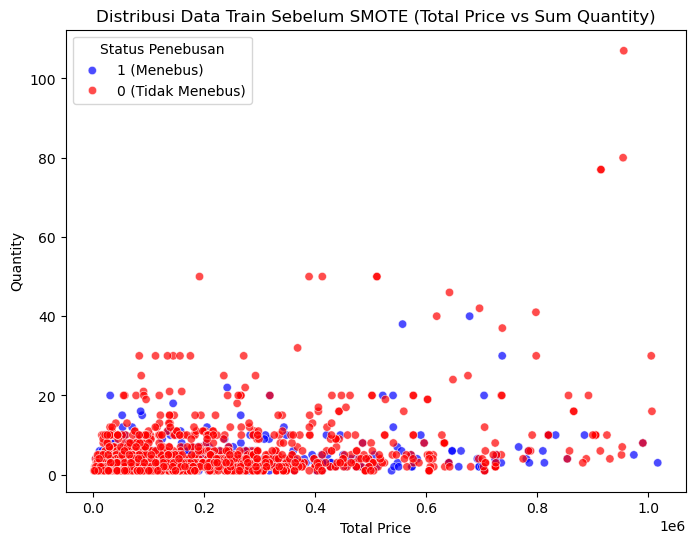

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="total_price", y="sum_qty", hue="status_penebusan", data=df1, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title("Distribusi Data Train Sebelum SMOTE (Total Price vs Sum Quantity)")
plt.xlabel("Total Price")
plt.ylabel("Quantity")
plt.legend(title="Status Penebusan", labels=["1 (Menebus)", "0 (Tidak Menebus)"])
plt.show()

In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 686
Before OverSampling, counts of label '0': 2156 



#### SMOTE

In [40]:
feature_names = ['product_count', 'sum_qty', 'total_price', 'Ecommerce_Tokopedia', 'Ecommerce_Shopee', 'Ecommerce_Apotek_Langsung', 'Daytype_Weekend', 'Daytype_Weekdays', 
                 'Timerange_00.00-06.00 WIB', 'Timerange_06.00-12.00 WIB', 'Timerange_12.00-18.00 WIB', 'Timerange_18.00-24.00 WIB']  

In [41]:
X_train_df1 = pd.DataFrame(X_train, columns=feature_names)
feature_names = X_train_df1.columns 

In [42]:
sm = SMOTE(random_state=2025)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [43]:
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote==0)))

After SMOTE, counts of label '1': 2156
After SMOTE, counts of label '0': 2156


In [44]:
df1_smote = pd.DataFrame(X_train_smote, columns=feature_names)  
df1_smote["status_penebusan"] = y_train_smote

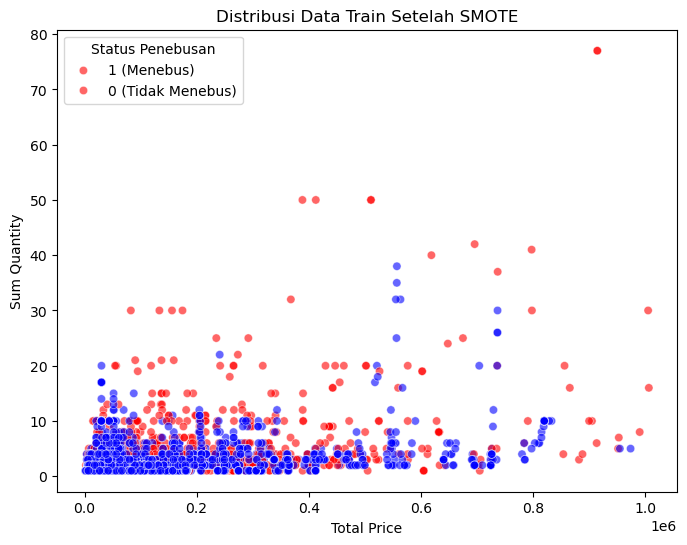

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df1_smote["total_price"],
    y=df1_smote["sum_qty"],
    hue=df1_smote["status_penebusan"],
    palette={0: "red", 1: "blue"},
    alpha=0.6
)

plt.title("Distribusi Data Train Setelah SMOTE")
plt.xlabel("Total Price")
plt.ylabel("Sum Quantity")
plt.legend(title="Status Penebusan", labels=["1 (Menebus)", "0 (Tidak Menebus)"])
plt.show()

## Random Forest Tanpa SMOTE

In [61]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification 
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [63]:
# Fungsi evaluasi model
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [64]:
# Parameter manual tanpa tuning
n_estimators = 100
max_depth = 5
min_samples_split = 5
min_samples_leaf = 2

In [65]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, random_state=2025, shuffle=True) #tidak digunakan untuk tuning, hanya untuk membagi data

In [66]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  random_state=2025,
                                 oob_score=True)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       oob_score=True, random_state=2025)

In [67]:
#rf_model.obb_score_

In [68]:
test_eval(rf_model, X_test, y_test, algo="Random Forest", sampling="ACTUAL")

Confusion Matrix
[[901   1]
 [316   0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       902
           1       0.00      0.00      0.00       316

    accuracy                           0.74      1218
   macro avg       0.37      0.50      0.43      1218
weighted avg       0.55      0.74      0.63      1218
 

AUC-ROC
0.6710158859356142


# Random Forest Dengan SMOTE

#### SMOTE

In [76]:
rf_model_smote = RandomForestClassifier(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  random_state=2025)

rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=2025)

In [77]:
test_eval(rf_model_smote, X_test, y_test, algo="Random Forest", sampling="SMOTE")

Confusion Matrix
[[763 139]
 [225  91]] 

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       902
           1       0.40      0.29      0.33       316

    accuracy                           0.70      1218
   macro avg       0.58      0.57      0.57      1218
weighted avg       0.67      0.70      0.68      1218
 

AUC-ROC
0.6335218501782256


# Logistic Regression Tanpa SMOTE

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [114]:
X_train.shape

(2842, 12)

In [115]:
X_test.shape

(1218, 12)

In [116]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=2025)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
cv_scores = cross_val_score(logmodel, X_train, y_train, cv=cv, scoring='roc_auc')
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=2025)

In [117]:
test_eval(logmodel, X_test, y_test, 'Logistic Regression', 'ACTUAL')

Confusion Matrix
[[891  11]
 [308   8]] 

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       902
           1       0.42      0.03      0.05       316

    accuracy                           0.74      1218
   macro avg       0.58      0.51      0.45      1218
weighted avg       0.66      0.74      0.64      1218
 

AUC-ROC
0.5285669679193915


In [118]:
logmodel.coef_

array([[-3.37352501e-01, -1.57490592e-02,  1.86173138e-06,
        -8.39089095e-02, -1.30483530e-01, -9.58576246e-02,
        -3.27543555e-02, -2.77495647e-01, -6.55330625e-03,
        -1.16395030e-01, -1.17739347e-01, -6.95623729e-02]])

In [119]:
logmodel.intercept_

array([-0.31043279])

# Logistic Regression Dengan SMOTE

#### SMOTE

In [123]:
from sklearn.linear_model import LogisticRegression
logmodel_smote = LogisticRegression(random_state=2025)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
cv_scores = cross_val_score(logmodel, X_train_smote, y_train_smote, cv=cv, scoring='roc_auc')
logmodel_smote.fit(X_train_smote,y_train_smote)

LogisticRegression(random_state=2025)

In [124]:
test_eval(logmodel_smote, X_test, y_test, 'Logistic Regression', 'SMOTE')

Confusion Matrix
[[448 454]
 [137 179]] 

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.50      0.60       902
           1       0.28      0.57      0.38       316

    accuracy                           0.51      1218
   macro avg       0.52      0.53      0.49      1218
weighted avg       0.64      0.51      0.54      1218
 

AUC-ROC
0.5926790676134609


In [125]:
logmodel_smote.coef_

array([[-4.08247349e-01,  2.28294840e-02,  1.00607340e-06,
         1.23688375e+00, -9.40497430e-01, -7.54958615e-01,
        -4.22501196e-01, -2.60937438e-01, -5.44587832e-02,
        -1.11857328e+00, -1.04436560e+00, -7.64159985e-01]])

In [126]:
logmodel_smote.intercept_

array([0.60285565])